# Data Exploration

In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import ElasticNet
import statsmodels as sm
from statsmodels.regression.linear_model import OLS
from sklearn import preprocessing
import math
from sklearn.ensemble import RandomForestRegressor as RDFR
from sklearn.ensemble import RandomForestClassifier as RDFC
from sklearn.linear_model import Ridge, RidgeCV, LassoCV,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import seaborn.apionly as sns
%matplotlib inline

### Summary
The data set contains 2930 observations and a large number of explanatory
variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home
values. 

-The 20 continuous variables relate to various area dimensions for each observation.

-The 14 discrete variables typically quantify the number of items occurring within the house. 

-There are a large number of categorical variables (23 nominal, 23 ordinal) associated with this data set. They range from 2 to 28 classes with the smallest being STREET (gravel or paved) and the largest being NEIGHBORHOOD (areas within the Ames city limits). 

-We are explorating the training dataset (1460 observations) here, and try to fit a model predicting final housing price.

In [2]:
# import data from Kaggle.com
df = pd.read_csv('train.csv')     #training dataset
df_test = pd.read_csv('test.csv') #test dataset

In [3]:
print 'Number of observations in training dataset:', df.shape[0]
print 'Number of observations in test dataset:', df.shape[1]
df.head()

Number of observations in training dataset: 1460
Number of observations in test dataset: 81


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print 'Dimension of training dataset:' ,df.shape, 'Dimension of the test dataset:', df_test.shape
df.head()

Dimension of training dataset: (1460, 81) Dimension of the test dataset: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#training dataset
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#test dataset
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


The training dataset has 1460 observations, and 81 columns containing the 1 column of ID, 79 columns of predictors, and 1 column of target variable  'SalePrice'. 

The test dataset has 1459 obsevations, and 80 columns containing 1 column of ID, and 79 columns of predictors. 

## Feature Summary

## A. Target variable: `SalePrice`

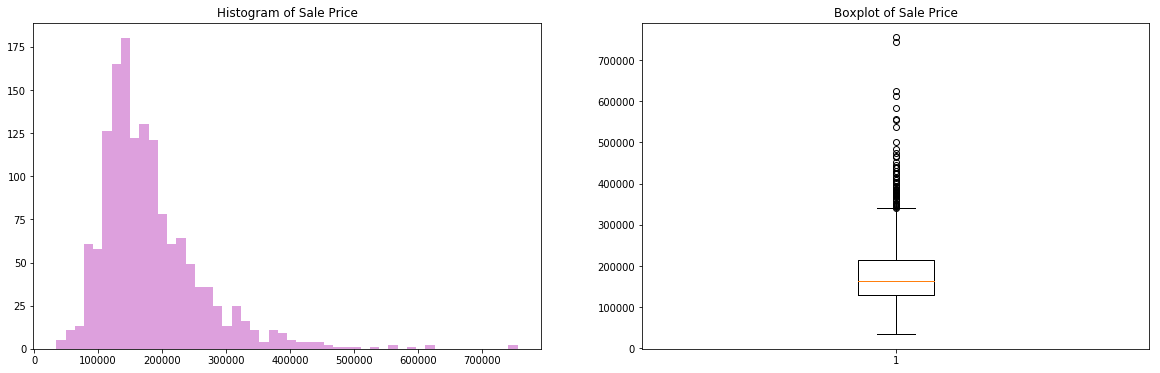

In [7]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 6))
ax1.hist(df['SalePrice'],bins=50,color='plum')
ax2.boxplot(df['SalePrice'])
ax1.set_title("Histogram of Sale Price")
ax2.set_title("Boxplot of Sale Price")
plt.show()

In [8]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The `SalePrice` variable looks right skewed. This needs to be treated in data preprocessing to make it a more normal distribution.

## B. Numerical Features
We identify the numerical features contained in the datasets.

In [9]:
numeric = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:37] #exclude column 0 and 38 which are Id and Saleprice
print "Number of numerical features:", numeric.shape[1]
numeric.describe()

Number of numerical features: 36


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


### B.1 Check for missing values among numerical predictors

In [10]:
# Training dataset
n_missing = []
for col in numeric:
    n_missing.append(numeric[col].isnull().values.sum())
missing = pd.DataFrame({'Features': numeric.columns.values, 
                        'Missing':n_missing})
print "Number of missing values among numerical predictors in the training data set:"
missing[missing.Missing != 0]

Number of missing values among numerical predictors in the training data set:


,Features,Missing
1,LotFrontage,259
7,MasVnrArea,8
24,GarageYrBlt,81


Among 36 numercal features in the training data set, there are 3 of them with missing values: `LotFrontage`, `MasVnrArea` and `GarageYrBlt`.

In [11]:
# Test dataset
numeric_test=df_test.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:37]
n_missing=[]
for col in numeric_test:
    n_missing.append(numeric_test[col].isnull().values.sum())
missing=pd.DataFrame({'Features': numeric_test.columns.values, 'Missing':n_missing})
print "Number of missing values among numerical predictors in the test data set:"
missing[missing['Missing']!=0]

Number of missing values among numerical predictors in the test data set:


,Features,Missing
1,LotFrontage,227
7,MasVnrArea,15
8,BsmtFinSF1,1
9,BsmtFinSF2,1
10,BsmtUnfSF,1
11,TotalBsmtSF,1
16,BsmtFullBath,2
17,BsmtHalfBath,2
24,GarageYrBlt,78
25,GarageCars,1


Among 36 numercal features in the test data set, there are 11 of them with missing values. We notice that there are several features with only one missing value. They all belong to the same observation. 

### B.2 Feature Importance
In the following, we  fit simple linear models to each of the numeric feature on "Sale Price" to get a rough idea of which features can better interpret the variation in "Sale Price". We rank the features by R-squared value, and top 10 features are shown below:

In [12]:
# Ordinary Linear Regressiong on SalePrice and numeric features
y = df['SalePrice'].values
r_squared=[]
pvalues=[]

for i in range(numeric.shape[1]):
    model = OLS(y, numeric[[i]].values)
    results = model.fit()
    r_squared.append(results.rsquared)
    pvalues.append(results.pvalues)
    
# Features with missing values in training dataset, refit after dropna
t1=df[['SalePrice','LotFrontage']].dropna()
t2=df[['SalePrice','MasVnrArea']].dropna()
t3=df[['SalePrice','GarageYrBlt']].dropna()

model1 = OLS(t1['SalePrice'].values, t1['LotFrontage'].values)
results1 = model1.fit()
r_squared1=results1.rsquared

model2 = OLS(t2['SalePrice'].values, t2['MasVnrArea'].values)
results2 = model2.fit()
r_squared2=results2.rsquared

model3 = OLS(t3['SalePrice'].values, t3['GarageYrBlt'].values)
results3 = model3.fit()
r_squared3=results3.rsquared

KeyError: '[0] not in index'

In [ ]:
# Consolidate in dataframe xs
xs = pd.DataFrame({'Features': numeric.columns.values, 
                   'R-squared':r_squared})
xs.loc[xs['Features'] == "LotFrontage",'R-squared'] = r_squared1
xs.loc[xs['Features'] == "MasVnrArea",'R-squared'] = r_squared2
xs.loc[xs['Features'] == "GarageYrBlt",'R-squared'] = r_squared3

xs.sort(['R-squared'], ascending = False)[:15]

From the exploratory analysis and our common sense/interests, we think following numeric features may be more significantly related to `SalePrice` among others: **`OverallQual, GrLivArea, 1stFlrSF, GarageCars, TotRmsAbvGrd, TotalBsmtSF, FullBath, GargeArea, YearBuilt, YearRemodAdd, YrSold`**.

We'll further explore the distribution and relationships of these features.

#### `GriLivArea`

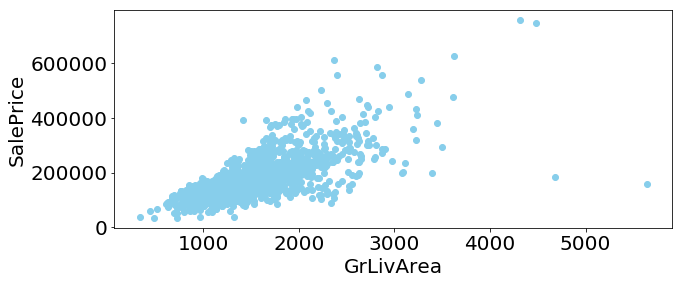

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))
ax.plot(numeric['GrLivArea'].values,y,'o',color='skyblue')
ax.set_xlabel('GrLivArea', size='20')
ax.set_ylabel('SalePrice', size='20')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.show()

It looks like there are a few outliers with extremely large above ground living area. We shall remove them from our consideration in data pre-processing. 
#### `OverallQual`, `FullBath`, `1stFlrSf`, `TotRmAbvGrd`, `TotalBsmtSF`, `GarageCars`

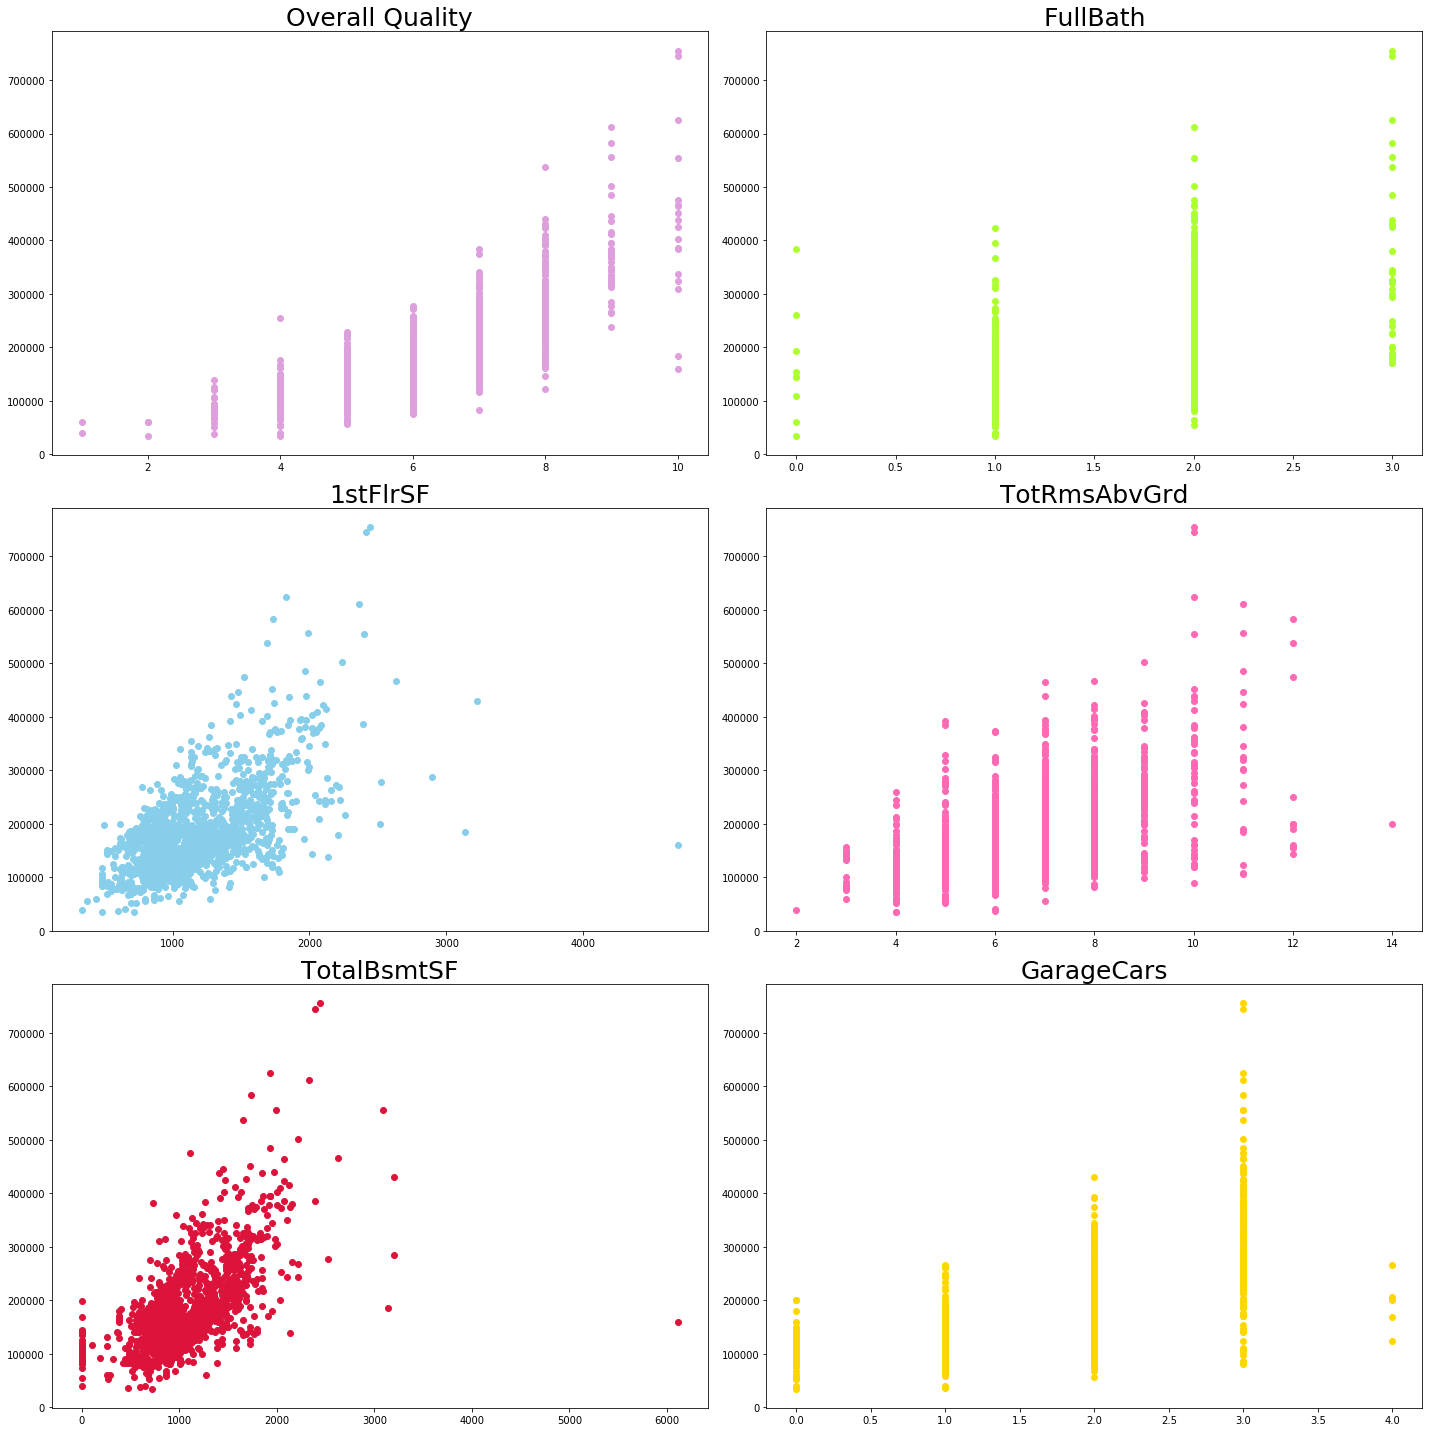

In [14]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20, 20))
ax1.set_title('Overall Quality',fontsize=25)
ax1=ax1.plot(numeric['OverallQual'].values,y,'o',color='plum')
ax2.set_title('FullBath',fontsize=25)
ax2=ax2.plot(numeric['FullBath'].values,y,'o',color='greenyellow')
ax3.set_title('1stFlrSF',fontsize=25)
ax3=ax3.plot(numeric['1stFlrSF'].values,y,'o',color='skyblue')
ax4.set_title('TotRmsAbvGrd',fontsize=25)
ax4=ax4.plot(numeric['TotRmsAbvGrd'].values,y,'o',color='hotpink')
ax5.set_title('TotalBsmtSF',fontsize=25)
ax5=ax5.plot(numeric['TotalBsmtSF'].values,y,'o',color='crimson')
ax6.set_title('GarageCars',fontsize=25)
ax6=ax6.plot(numeric['GarageCars'].values,y,'o',color='gold')
plt.tight_layout()
plt.show()

As shown in the plots, **`OverallQual, GrLivArea, 1stFlrSF, GarageCars, TotRmsAbvGrd, TotalBsmtSF, `and `GargeArea`** all increase as `SalePrice` of the property increases. They are all positively related to sale price, and the relationships are roughly linear.
Also notice that some of these predictors have discrete values and others are continuous. We proceed to differentiate between the two manually. 

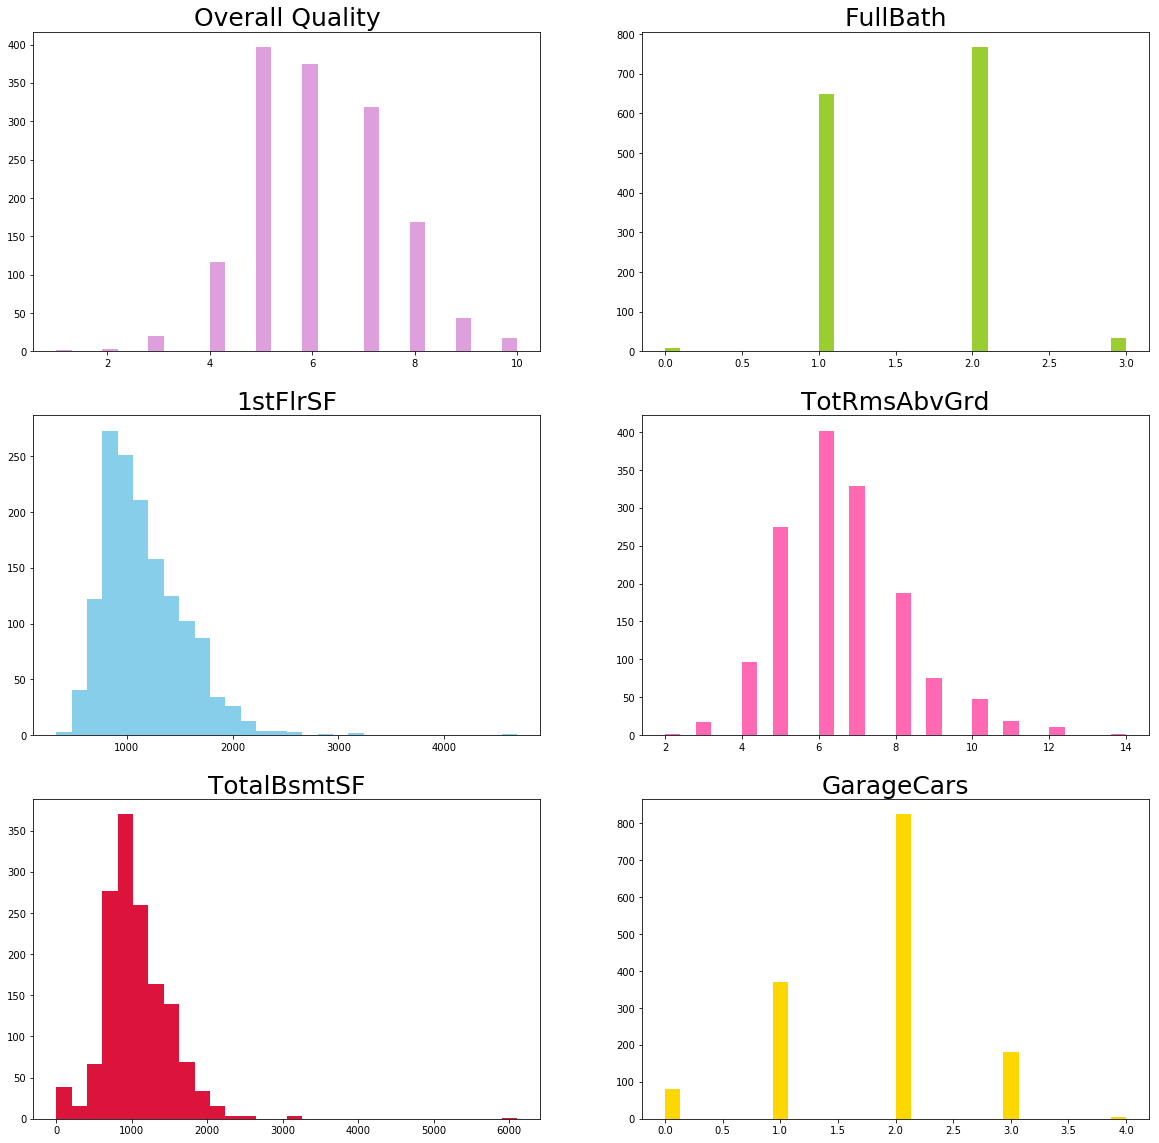

In [15]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20, 20))
ax1.set_title('Overall Quality',fontsize=25)
ax1=ax1.hist(numeric['OverallQual'].values,color='plum',bins=30)
ax2.set_title('FullBath',fontsize=25)
ax2=ax2.hist(numeric['FullBath'].values,color='yellowgreen',bins=30)
ax3.set_title('1stFlrSF',fontsize=25)
ax3=ax3.hist(numeric['1stFlrSF'].values,color='skyblue', bins=30)
ax4.set_title('TotRmsAbvGrd',fontsize=25)
ax4=ax4.hist(numeric['TotRmsAbvGrd'].values,color='hotpink', bins=30)
ax5.set_title('TotalBsmtSF',fontsize=25)
ax5=ax5.hist(numeric['TotalBsmtSF'].values,color='crimson', bins=30)
ax6.set_title('GarageCars',fontsize=25)
ax6=ax6.hist(numeric['GarageCars'].values, color='gold',bins=30)

plt.show()

As shown above, there's no extreme deviation of normal distribution for the distribution of **OverallQual, GrLivArea, 1stFlrSF, GarageCars, TotRmsAbvGrd, TotalBsmtSF, and GargeArea**. The distribution of GrLivArea and 1stFlrSF are slightly right-skewed.

### B.3 Feature Correlation
We check for any possible correlations between numerical features.

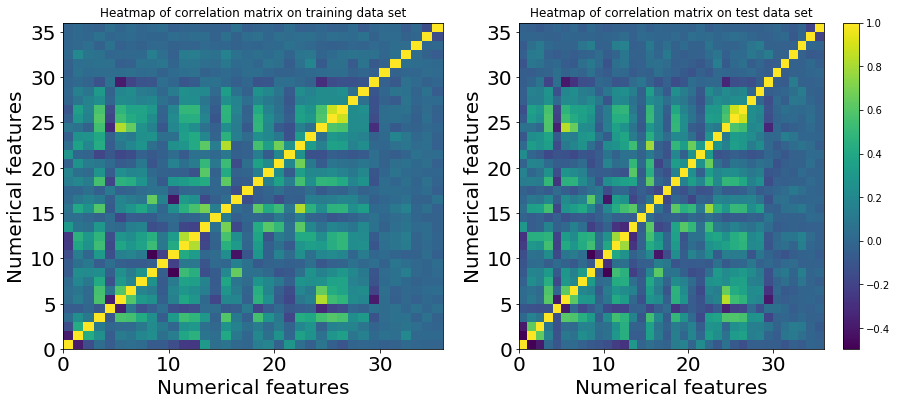

In [16]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15,6))

# Training dataset
corr_train = numeric.corr()
ax1.pcolor(corr_train)
ax1.set_xlim([0,36])
ax1.set_ylim([0,36])
ax1.set_xlabel('Numerical features', size='20')
ax1.set_ylabel('Numerical features', size='20')
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_title('Heatmap of correlation matrix on training data set')

# Test dataset
corr_test = numeric_test.corr()
ax2.pcolor(corr_test)
ax2.set_xlim([0,36])
ax2.set_ylim([0,36])
ax2.set_xlabel('Numerical features', size='20')
ax2.set_ylabel('Numerical features', size='20')
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_title('Heatmap of correlation matrix on test data set')

plt.colorbar(ax.pcolor(corr_train))
plt.show()

From the correlation heat maps, there are few if any features that are highly correlated. This means we are able to perform **multilinear regression** on the numerical features to fill in the missing values without additional treatment. 

For the list of more important numerical features above, we check their correlation in following using the training data set:

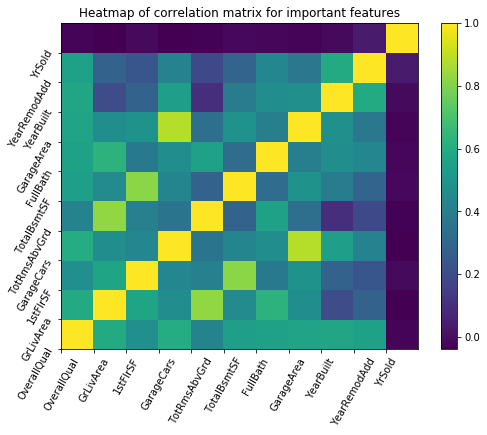

In [17]:
# sig: significant numerical features
sig_label = ['OverallQual', 'GrLivArea', '1stFlrSF', 'GarageCars', 'TotRmsAbvGrd', 'TotalBsmtSF', 
                    'FullBath', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'YrSold']
sig = numeric[sig_label]

# Correlation betwween important features
corr = sig.corr()
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.pcolor(corr)
ax.set_xlim([0,11])
ax.set_ylim([0,11])
ax.set_title('Heatmap of correlation matrix for important features')
ax.set_xticks(range(0,11))
ax.set_yticks(range(0,11))
ax.set_xticklabels(sig_label,rotation=60)
ax.set_yticklabels(sig_label,rotation=60)
plt.colorbar(ax.pcolor(corr))
plt.show()

`GarageArea` and `GarageCars` are highly correlated - since a larger garage area is able to house a greater number of cars. `TotRmsAbvGrd` (total number of rooms above ground) and `GrLivArea` (above ground living area) are also somewhat correlated since a larger living area usually mean a greater number of rooms. However, we did not remove either feature from our model since the correlation is not extremely high, and we do not want to eliminate any possible effects of either. 

## C. Categorical Features
We proceed to examine the categorical features in the dataset. 

In [19]:
categorical = df.select_dtypes(include = ['object'])
print "Number of categorical features identified:", categorical.shape[1]
print "They are: ", categorical.columns.values
categorical.describe()

Number of categorical features identified: 43
They are:  ['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [20]:
categorical_full = pd.concat([categorical, df[['MSSubClass', 'OverallQual', 'OverallCond']]])
print 'Number of categorical features:', categorical_full.shape[1]

Number of categorical features: 46


There are therefore a total of 46 categorical variables. 

### C.1 Missing Values

In [23]:
# check missing value
n_missing_categorical = []
for col in categorical_full:
    n_missing_categorical.append(categorical_full[col].isnull().values.sum())
missing_categorical=pd.DataFrame({'Features': categorical_full.columns.values, 'Missing':n_missing_categorical})
print "Number of missing values in both training and test datasets"
missing_categorical[missing_categorical['Missing']!=0]

Number of missing values in both training and test datasets


,Features,Missing
0,Alley,2829
1,BldgType,1460
2,BsmtCond,1497
3,BsmtExposure,1498
4,BsmtFinType1,1497
5,BsmtFinType2,1498
6,BsmtQual,1497
7,CentralAir,1460
8,Condition1,1460
9,Condition2,1460


However, we notice that for some of these categorical features, 'NA' as in not applicable is a valid response. We identify these and furthur treat them in the next section of data processing.

### C.2 Summary of features

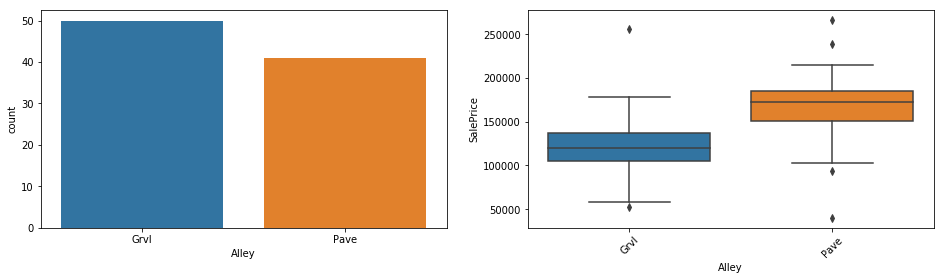

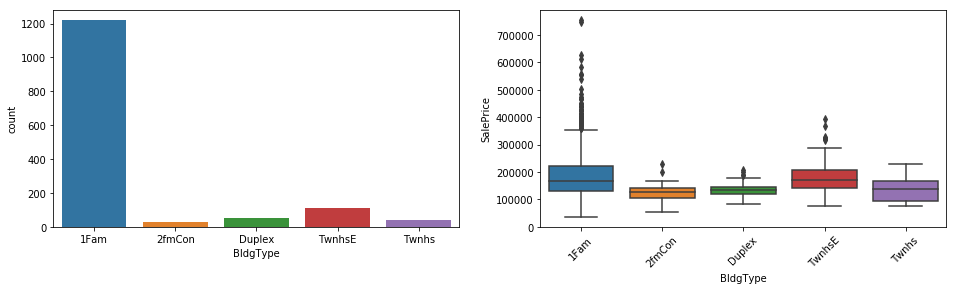

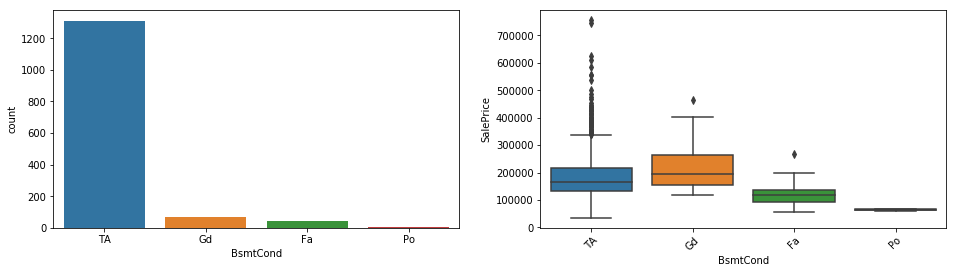

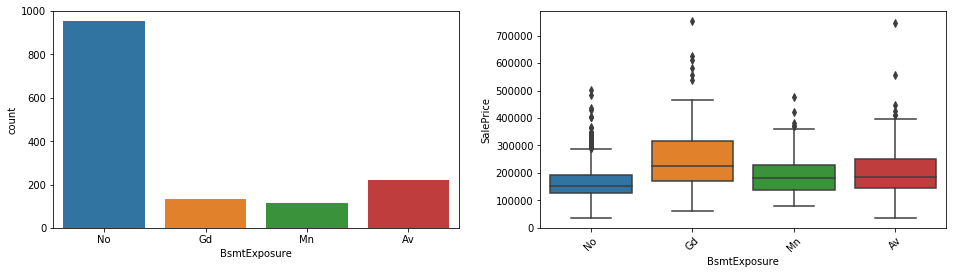

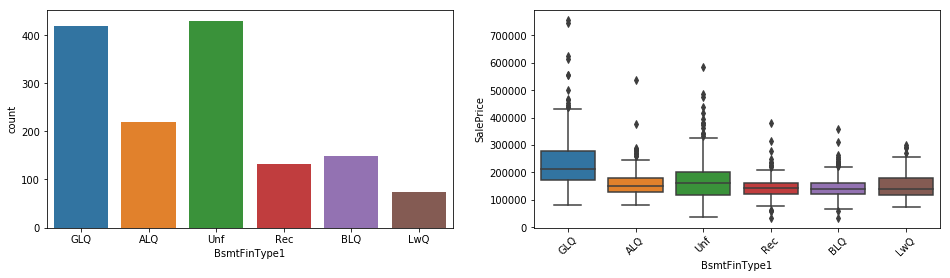

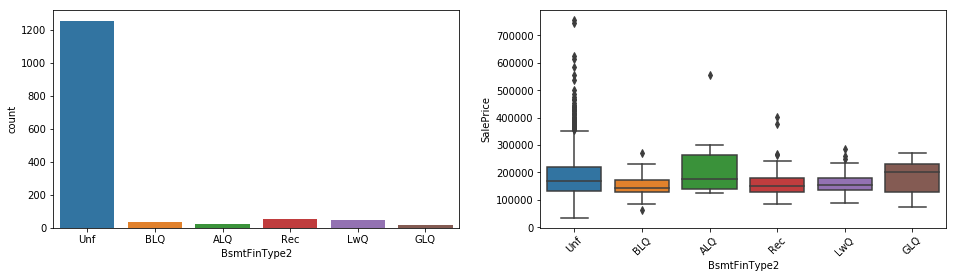

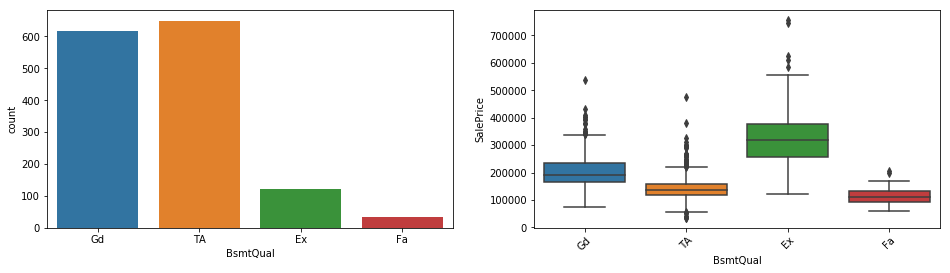

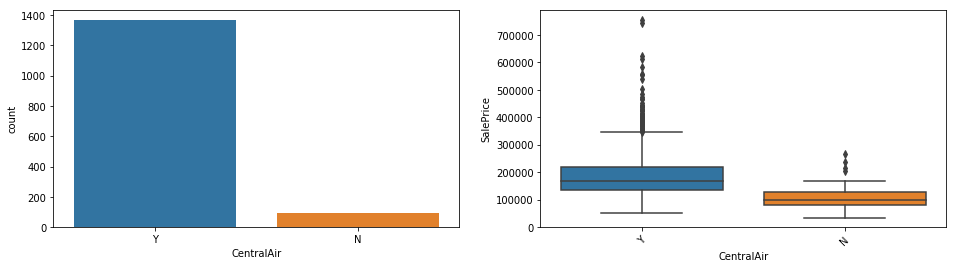

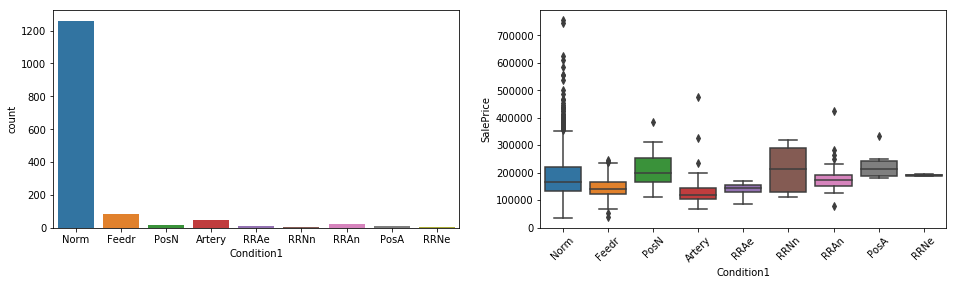

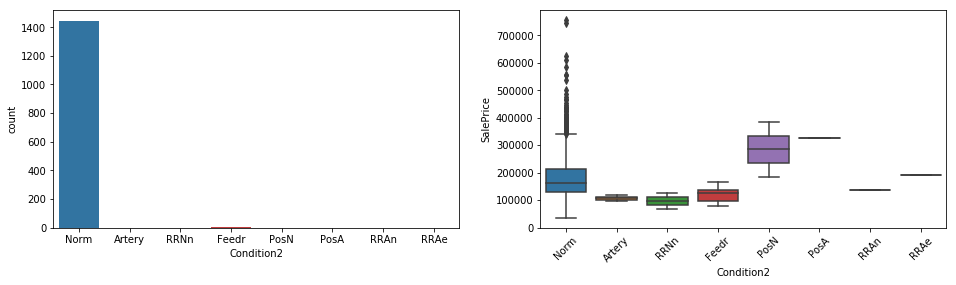

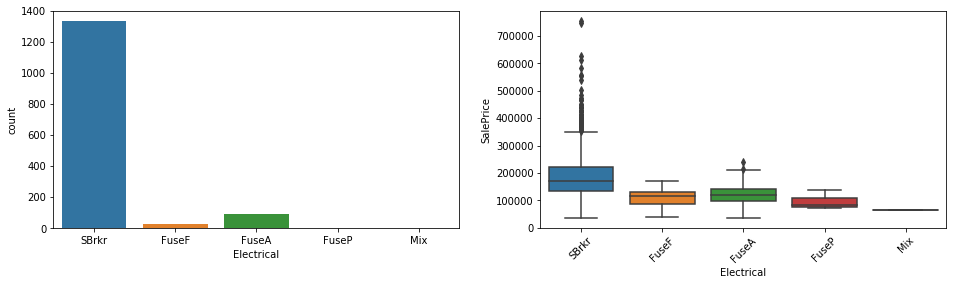

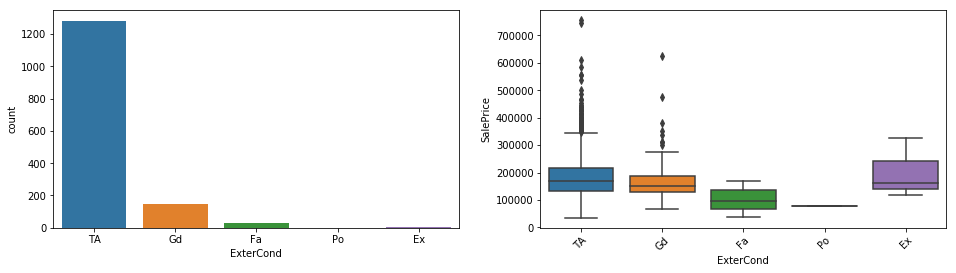

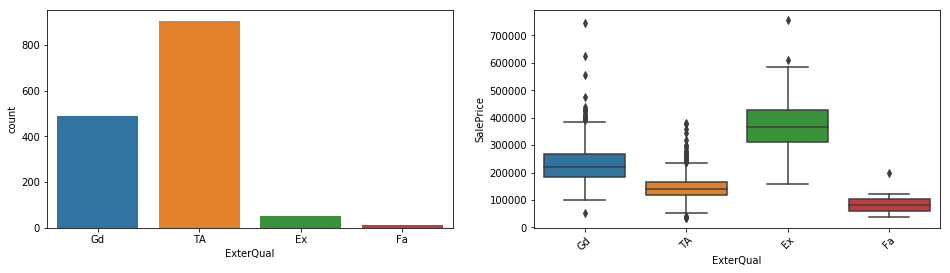

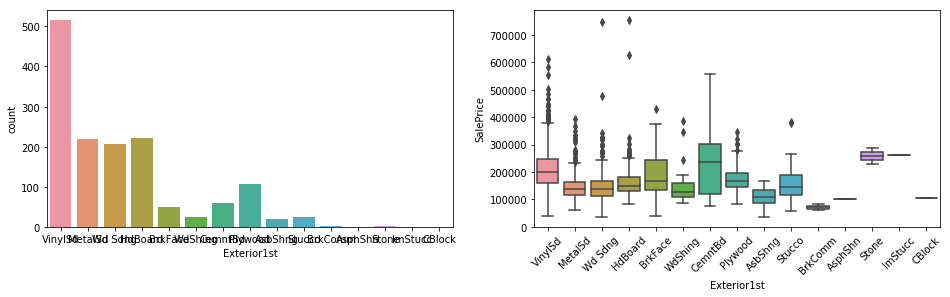

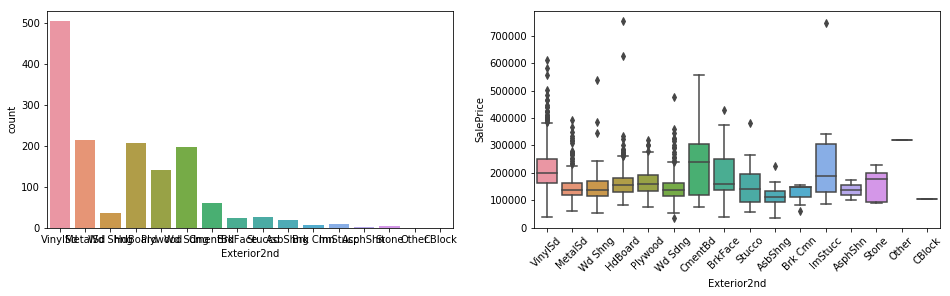

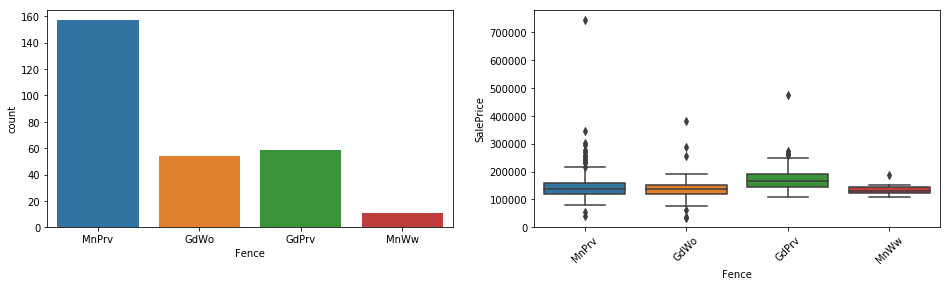

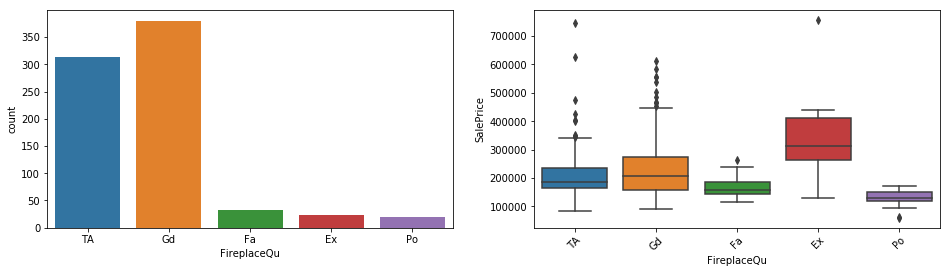

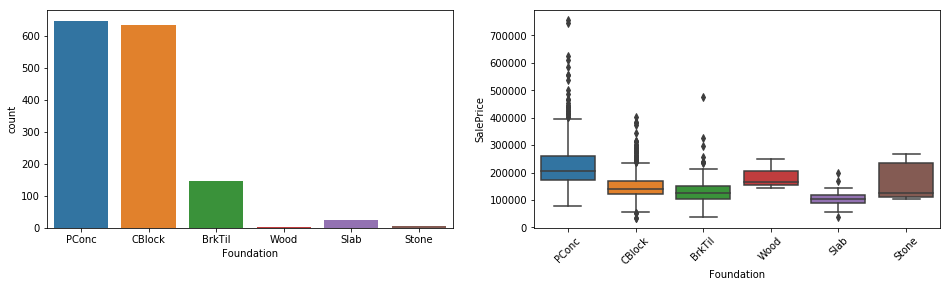

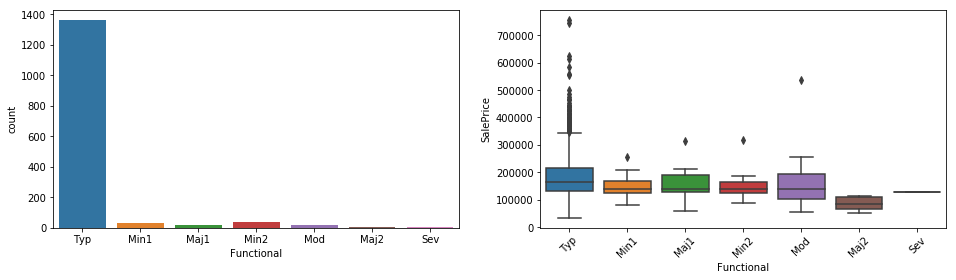

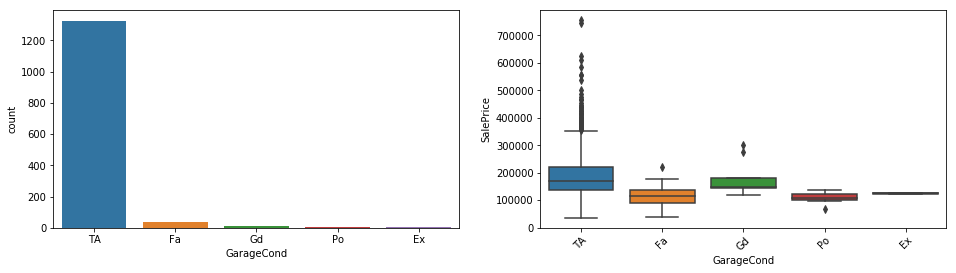

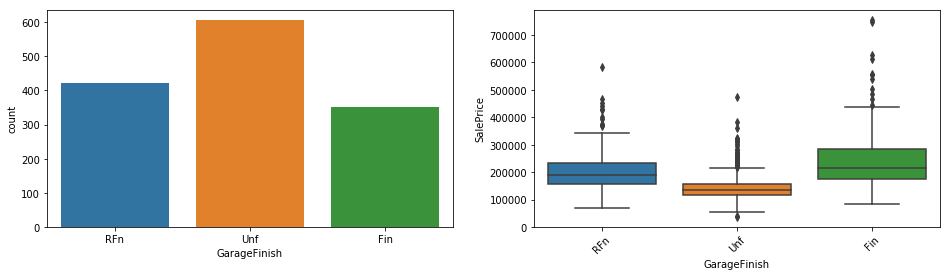

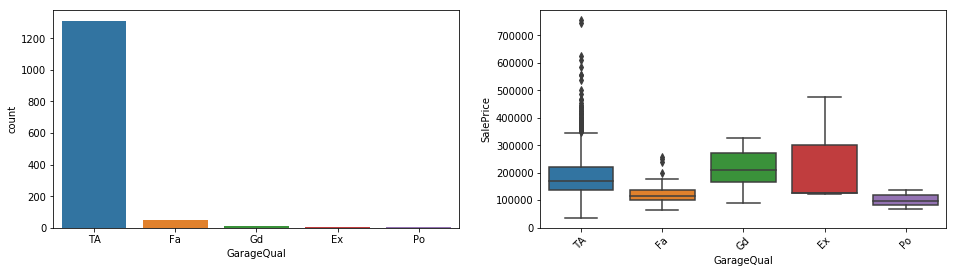

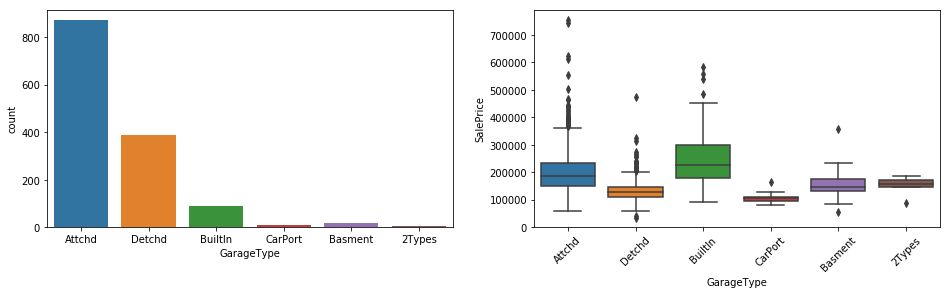

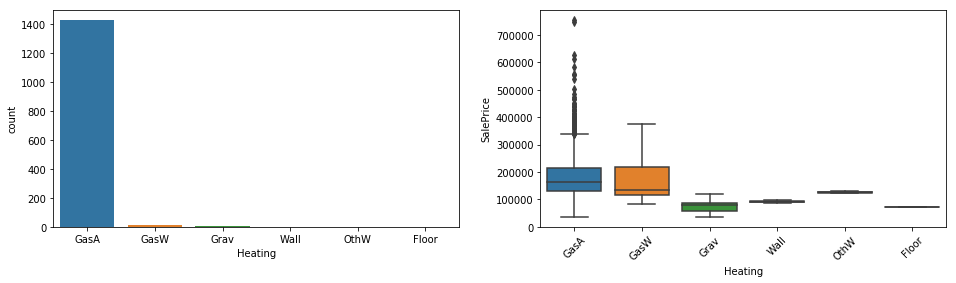

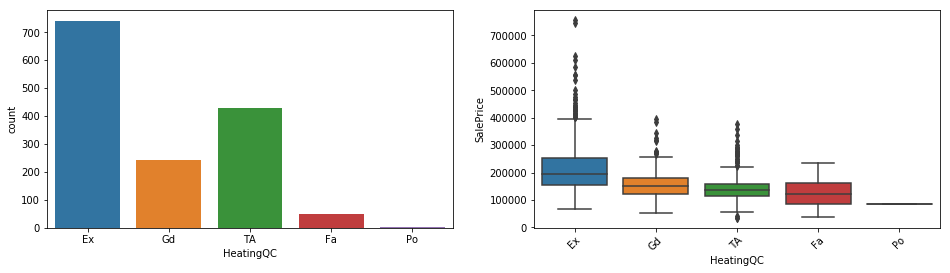

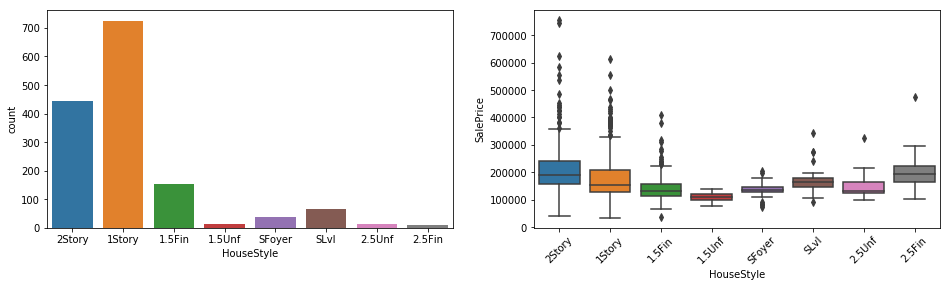

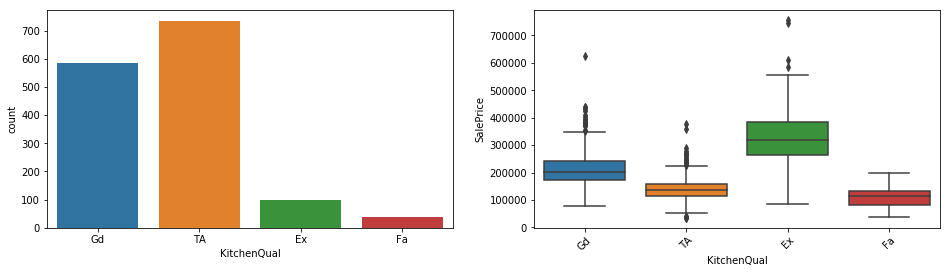

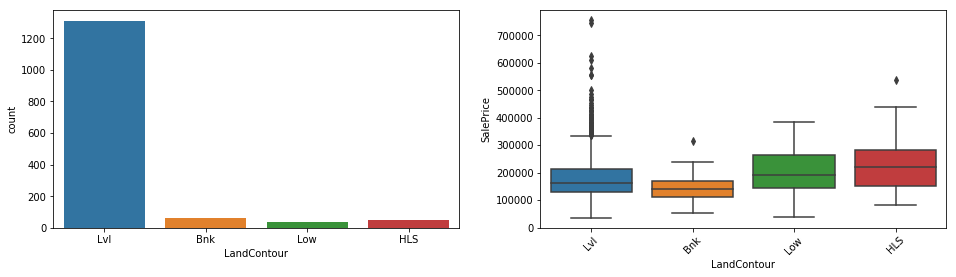

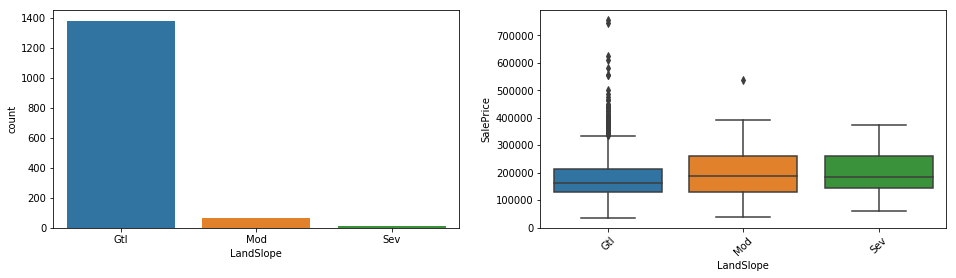

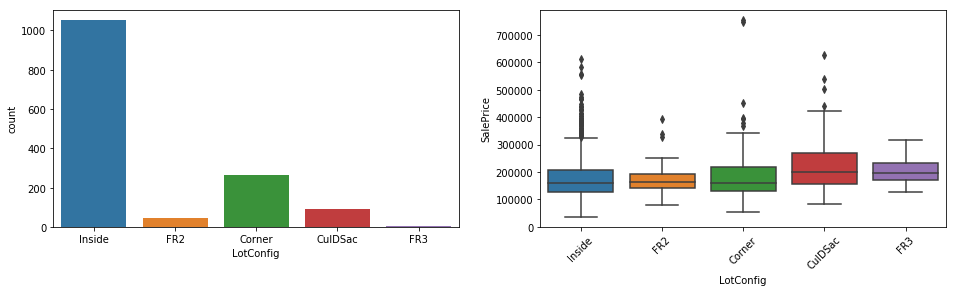

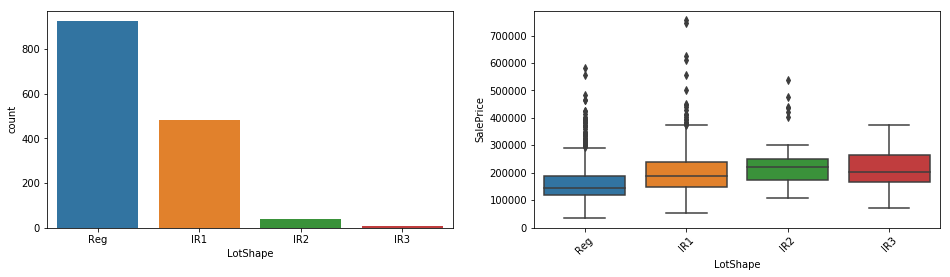

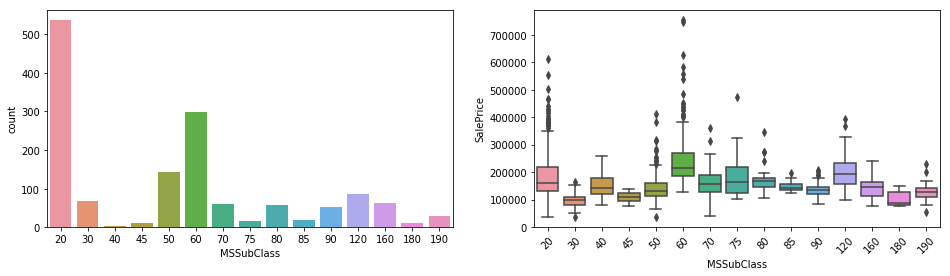

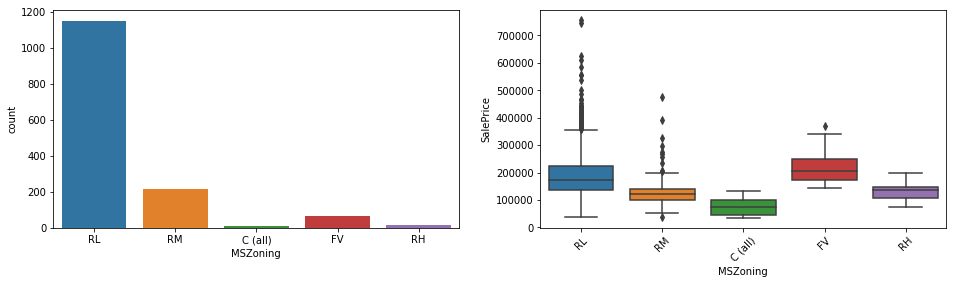

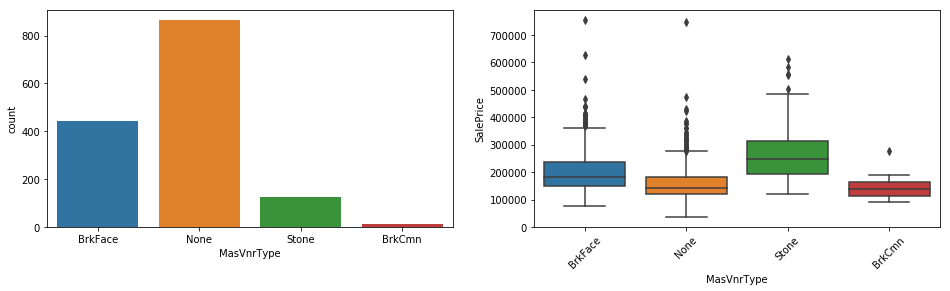

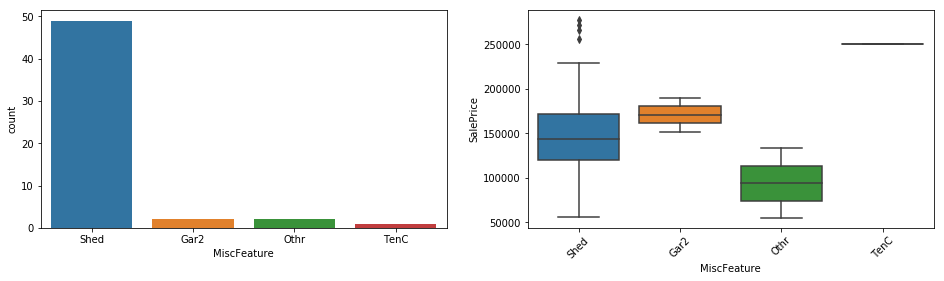

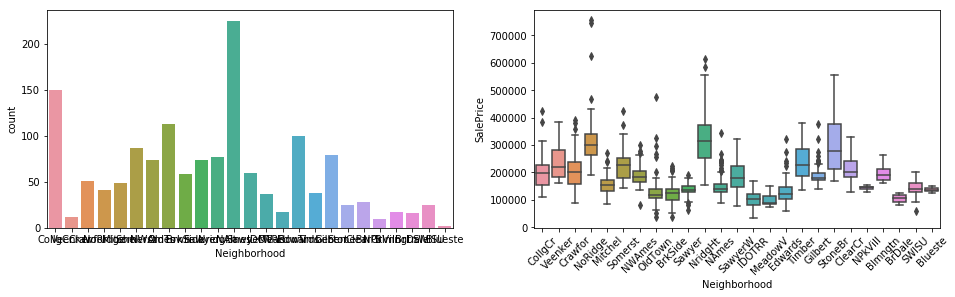

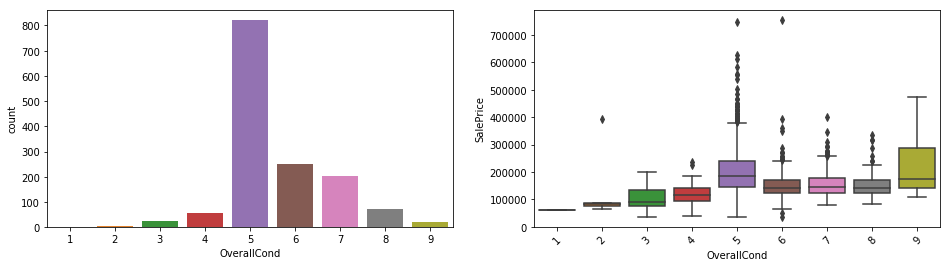

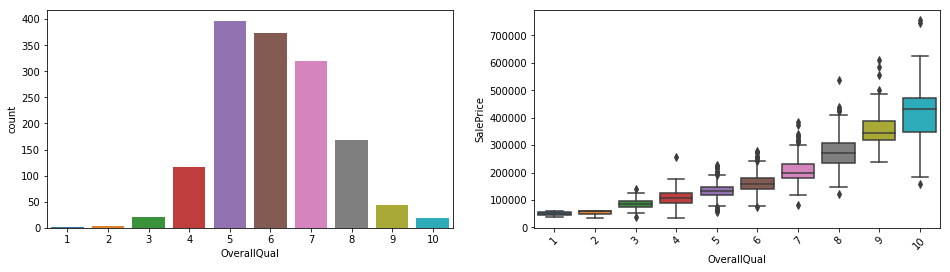

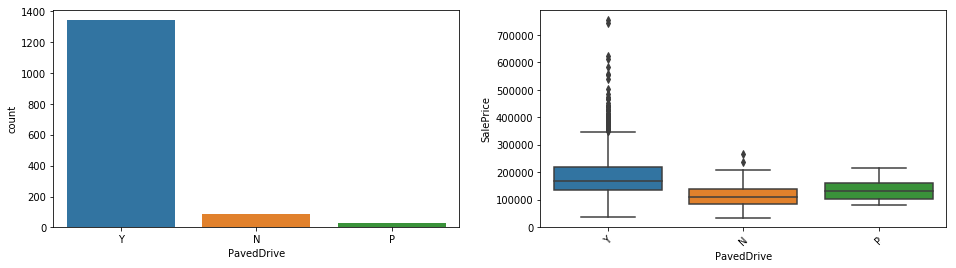

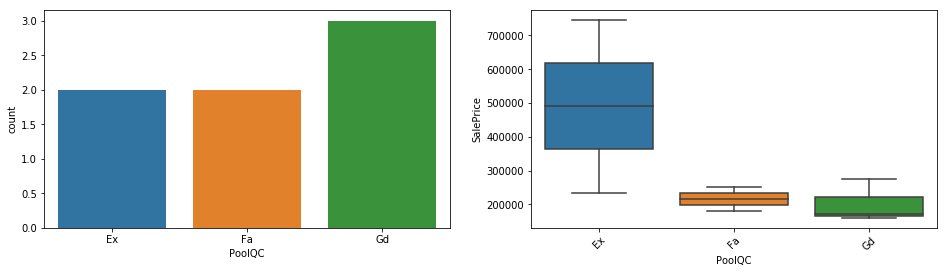

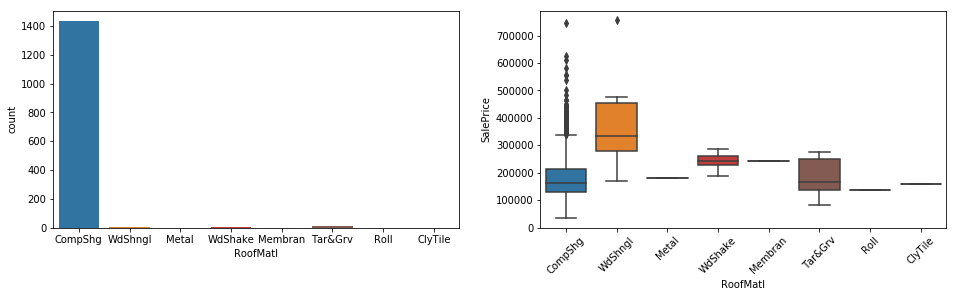

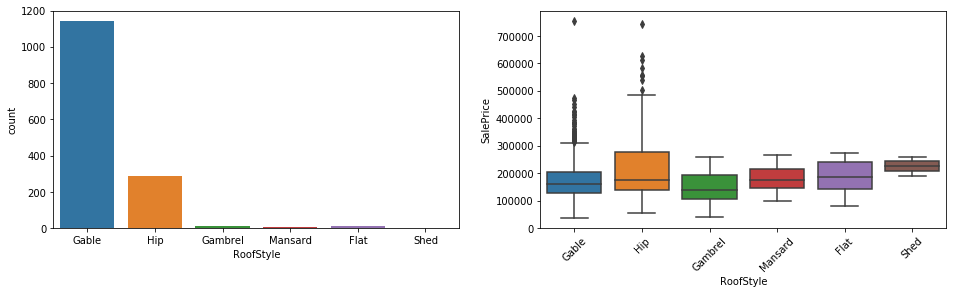

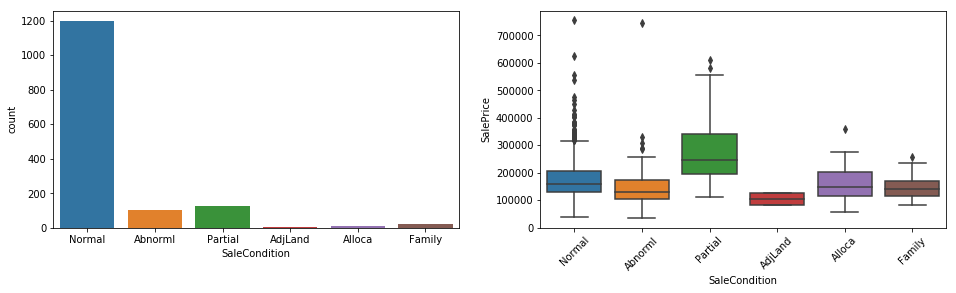

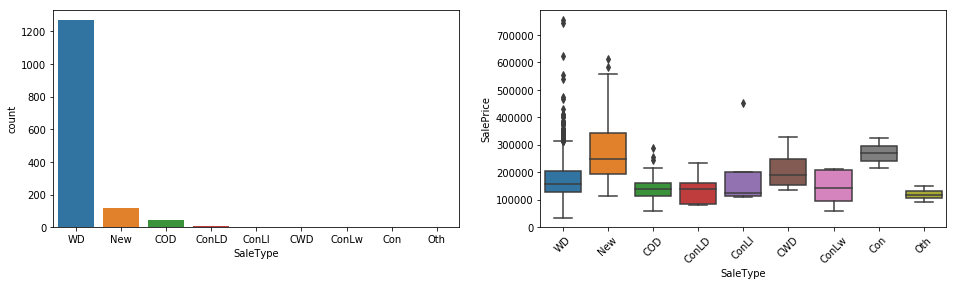

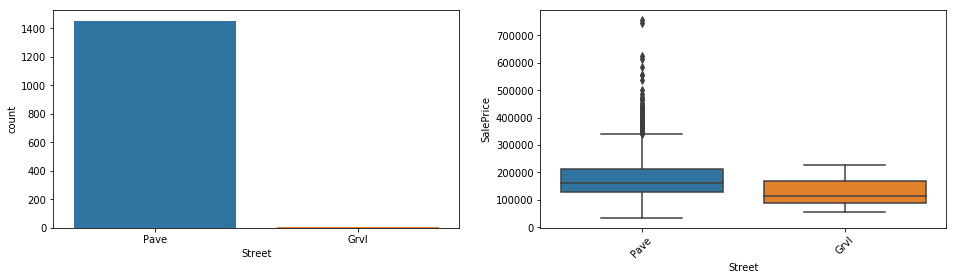

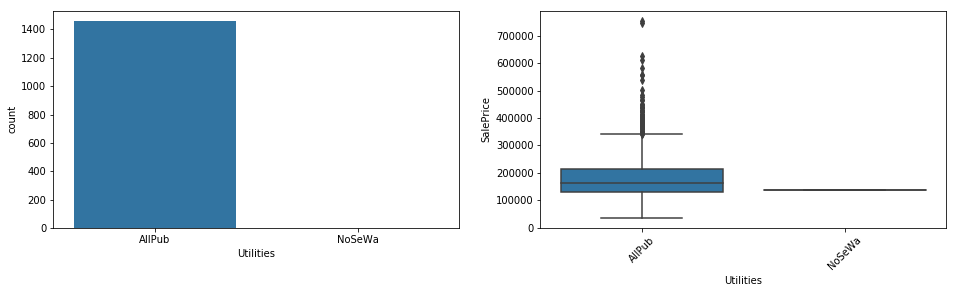

In [26]:
for category in categorical_full:
    f, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 4))
    sns.countplot(x = category, data = df, ax=ax1)
    xt = plt.xticks(rotation=45)
    sns.boxplot(x = category, y = 'SalePrice',  data = df, ax=ax2)
    xt = plt.xticks(rotation=45)
    plt.show()

## D. Time variables:

Among the 79 predictors in our data sets, there are 3 time variables: `YearBuilt` (Original construction date), `YearRemodAdd` (Remodel date), `YrSold` (Year Sold), and `GarageYrBlt` (Garage construction date). We'll use these to explore if there is any time trend in `SalePrice`.

In [31]:
yearfeature = pd.DataFrame({'Price':df['SalePrice'], 
                            'Built': numeric['YearBuilt'],
                            'Remod': numeric['YearRemodAdd'], 
                            'Sold': numeric['YrSold'], 
                            'Garage':numeric['GarageYrBlt']})

In [34]:
y1=yearfeature.sort_values(['Built'])
y2=yearfeature.sort_values(['Remod'])
y3=yearfeature.sort_values(['Sold'])
y4=yearfeature.sort_values(['Garage'])
y1g = y1.groupby('Built')['Price'].mean()
y2g = y2.groupby('Remod')['Price'].mean()
y3g = y3.groupby('Sold')['Price'].mean()
y4g = y4.groupby('Garage')['Price'].mean()

#### `YearBuilt`

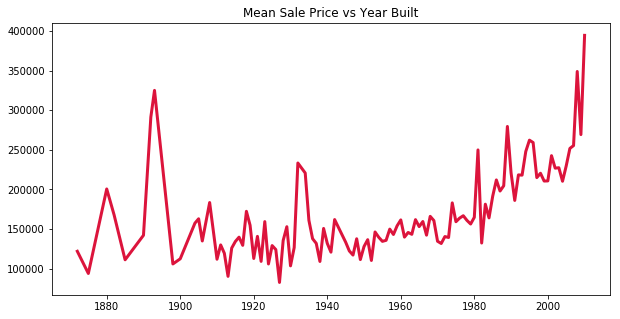

In [35]:
fig = plt.figure(figsize=(10, 5))
plt.plot(y1g.index.values,y1g, color='crimson',linewidth=3)
plt.title("Mean Sale Price vs Year Built")
plt.show()

#### `YearRemodAdd`

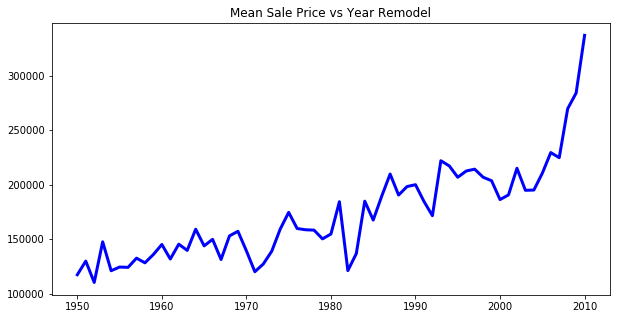

In [36]:
fig = plt.figure(figsize=(10, 5))
plt.plot(y2g.index.values,y2g, color='blue',linewidth=3)
plt.title("Mean Sale Price vs Year Remodel")
plt.show()

#### `YrSold`

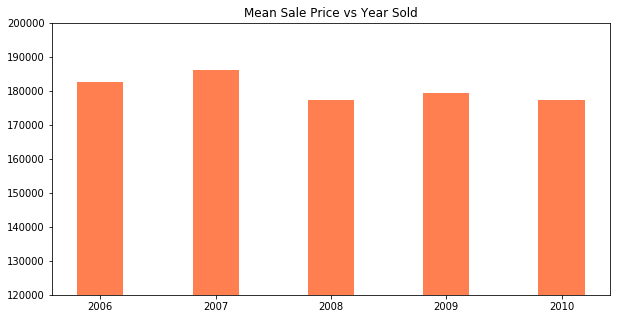

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
width = 0.4 
ax.bar(y3g.index.values,y3g,width,color='coral')
ax.set_title("Mean Sale Price vs Year Sold")
ax.set_ylim(120000,200000)
ax.set_xticks(y3g.index.values)
ax.set_xticklabels(('2006', '2007', '2008', '2009', '2010'))
plt.show()

#### `GarageYrBlt`

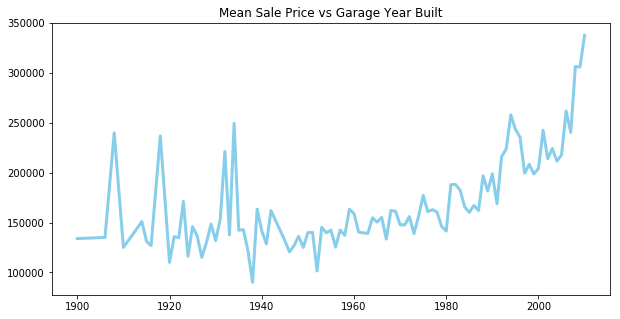

In [38]:
fig = plt.figure(figsize=(10, 5))
plt.plot(y4g.index.values,y4g, color='skyblue',linewidth=3)
plt.title("Mean Sale Price vs Garage Year Built")
plt.show()

1. From the first graph, it looks like newer built houses generally sell for higher prices, with some exceptions.
2. From the second graph, we can tell that newer the renovation of houses, the higher its sale price.
3. From the third graph, we can tell that in general there is no strong trend in the sale price of a house in relations to the year it is sold in. However, we do see a little dip in the year of 2008 which might be a result of the general economic downturn. 
4. The fourth graph tells us that from 1940 onwards, houses with newer garages tend to sell for higher prices.